In [0]:
!pip install scipy==1.2  --user

!pip install pmdarima


     |████████████████████████████████| 26.6MB 9.1MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 921kB 3.4MB/s 


In [0]:
%matplotlib inline

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float, array
import numpy as np
import seaborn as sns
import requests
import pandas as pd
import numpy as np
import json 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm 
from statsmodels.api import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
import seaborn as sns
from fbprophet import Prophet   

# Notice: you need to run this command
# !!pip install scipy==1.2  --user




In [0]:
# upload data from local disk
from google.colab import files
uploaded = files.upload()

Saving crimesdata.csv to crimesdata.csv


In [0]:
# convert the uploaded file to a dataframe
import io
crimes = pd.read_csv(io.BytesIO(uploaded['crimesdata.csv']))


In [0]:
data = crimes
data_ets = data
data.tail()

,Unnamed: 0,ds,y
1840,1840,2017-08-01,568
1841,1841,2017-09-01,676
1842,1842,2017-10-01,659
1843,1843,2017-11-01,633
1844,1844,2017-12-01,608


Applying Auto.ARIMA on Crimes Data

In [0]:
# Splitting the dataset


# 1845 outputs
data.set_index('ds')
train = data.iloc[:-200, :]
test = data.iloc[-200:, :]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845 entries, 0 to 1844
Data columns (total 3 columns):
Unnamed: 0    1845 non-null int64
ds            1845 non-null object
y             1845 non-null int64
dtypes: int64(2), object(1)
memory usage: 43.3+ KB


In [0]:
'''ARIMA 2 auto arima'''
stepwise_model = auto_arima(data['y'], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=7,
                           start_P=0,  max_P=2, start_Q=0, max_Q=2, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

stepwise_model.fit(train['y'])

future_forecast  = stepwise_model.predict(n_periods=len(test))


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=22370.858, BIC=22392.921, Fit time=1.833 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=22895.136, BIC=22906.167, Fit time=0.124 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=22164.340, BIC=22186.404, Fit time=2.136 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=21369.712, BIC=21391.775, Fit time=3.048 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=21368.370, BIC=21395.949, Fit time=4.123 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=22105.242, BIC=22127.306, Fit time=2.466 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=21372.515, BIC=21405.610, Fit time=12.272 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=22662.971, BIC=22679.519, Fit time=0.483 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 7); AIC=21372.118, BIC=21410.729, Fit time=12.068 seconds
Fit ARIMA: order=

In [0]:
# metrics for SARIMA
sarima_rmse = np.sqrt(np.mean(np.square(test.y - future_forecast)))
mape = np.mean(np.abs(future_forecast - test.y)/np.abs(test.y))

print("RMSE of SARIMA = ",sarima_rmse)
print("MAPE of SARIMA = ", mape)

RMSE of SARIMA =  87.80494104632427
MAPE of SARIMA =  0.10474994040582386


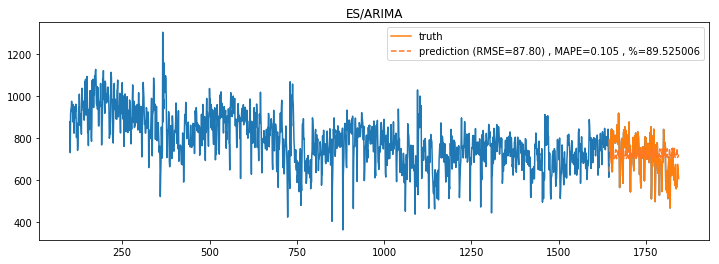

In [0]:
# Plotting results
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(data['y'].index[100:-24], data['y'].values[100:-24]);
ax.plot(test.index, test.y, label='truth');
ax.plot(test.index, future_forecast, color='#ff7823', linestyle='--', label="prediction (RMSE={:0.2f}) , MAPE={:0.3f} , %={:f}".format(sarima_rmse,mape,100-(mape*100)));
ax.legend();
ax.set_title("ES/ARIMA");
plt.show()

# Applying *ETS* on Crimes Data

In [0]:
# Data preprocessing for ETS

data_ets['ds'] = pd.to_datetime(data_ets.ds)
data_ets.set_index('ds', inplace=True)
data_ets.sort_index(inplace=True)
data_ets = data_ets.filter(['ds','y'], axis=1)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1845 entries, 2012-01-01 to 2017-12-01
Data columns (total 1 columns):
y    1845 non-null int64
dtypes: int64(1)
memory usage: 28.8 KB


In [0]:

train_ets = data_ets.iloc[:-200, :]
test_ets = data_ets.iloc[-200:, :]
train_ets.head()


,y
ds,
2012-01-01,1451
2012-01-02,1034
2012-01-03,1030
2012-01-04,992
2012-01-05,1051


In [0]:
# ETS Model



import timeit

start = timeit.default_timer()

#Your statements here


#fitting the model seasonal periods here is annual = 12 month
model = ExponentialSmoothing(np.asarray(train['y']), trend="add", seasonal="add", seasonal_periods=365)
model._index= train_ets.index
fit = model.fit(use_boxcox=True)
#forecast 24 month
p = fit.forecast(len(test_ets)-1)

stop = timeit.default_timer()

print('Time: ', stop - start)  



KeyboardInterrupt: ignored

In [0]:
#rmse
ets_rmse = np.sqrt(np.mean(np.square(test.y - p)))
#mape 
ets_mape = np.mean(np.abs(p - test_ets.y)/np.abs(test_ets.y))

print("RMSE of ETS = ",ets_rmse)
print("MAPE of ETS = ", ets_mape)
print("Exactitude = ", (1-ets_mape)*100)


RMSE of ETS =  95.12070019067622
MAPE of ETS =  0.10895393617288064
Exactitude =  89.10460638271194


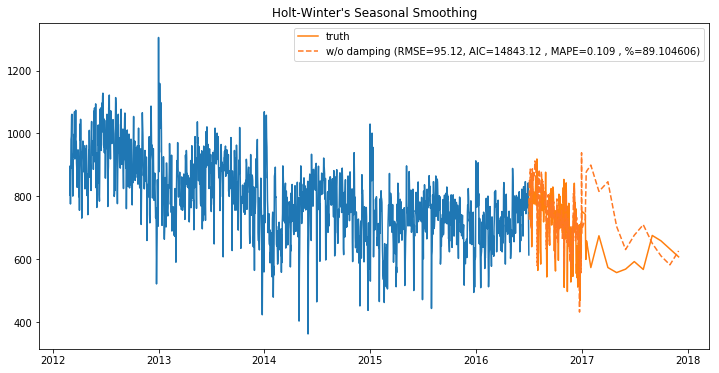

In [0]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index[60:], train.values[60:]);
ax.plot(test.index, test.values, label='truth');
ax.plot(test.index, p, linestyle='--', color='#ff7823', label="w/o damping (RMSE={:0.2f}, AIC={:0.2f} , MAPE={:0.3f} , %={:f})".format(sse1, fit.aic,mape, 100-(mape*100)));
ax.legend();
ax.set_title("Holt-Winter's Seasonal Smoothing");
plt.show()


# Applying *Facebook Prophet* on Crimes Data

In [0]:
import timeit
start = timeit.default_timer()


m = Prophet(growth="linear", seasonality_mode="additive", changepoint_prior_scale=10, seasonality_prior_scale = 20, yearly_seasonality=False).add_seasonality(name='yearly', period=365.25, fourier_order=5).add_seasonality(name='weekly', period=7, fourier_order=30)
m.fit(train)
# create a new period to forecast
future = m.make_future_dataframe(periods=len(test), include_history=False)
# making the forecast
forecast = m.predict(future)

stop = timeit.default_timer()

print('Time: ', stop - start)  

ValueError: ignored

In [0]:
#rmse
sse1 = np.sqrt(np.mean(np.square(test.y.values - forecast.yhat)))
#mape 
mape = np.mean(np.abs(forecast.yhat - test.y.values)/np.abs(test.y.values))
mape
print("RMSE of Prophet = ",sarima_rmse)
print("MAPE of Prophet = ", mape)
print("Exactitude = ", (1-mape)*100)

RMSE of Prophet =  87.80494104632427
MAPE of Prophet =  0.09241737121254644
Exactitude =  90.75826287874536


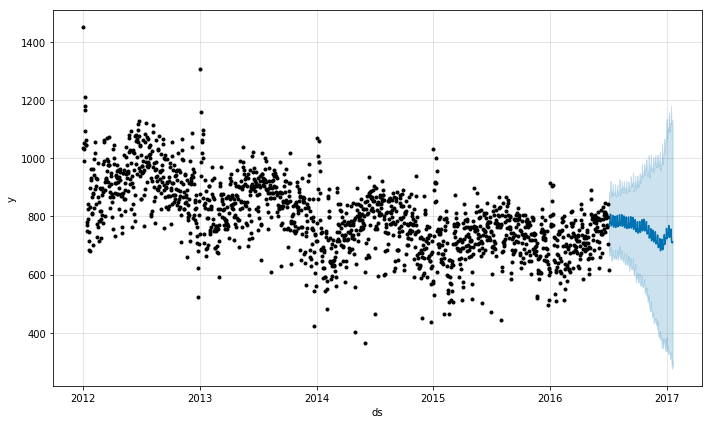

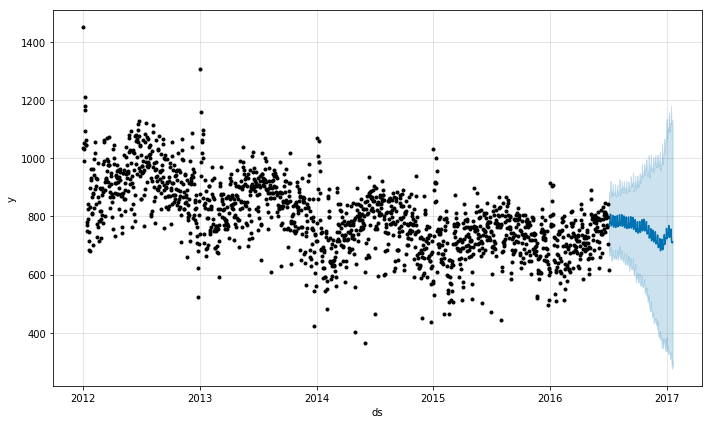

In [0]:
m.plot(forecast)

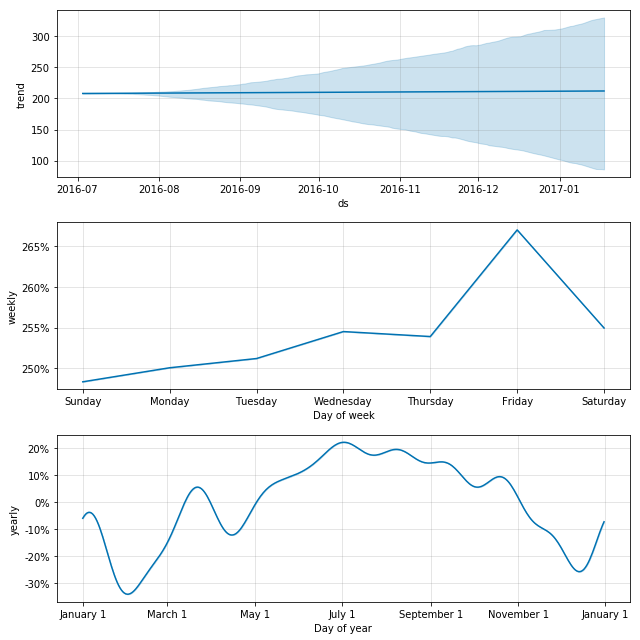

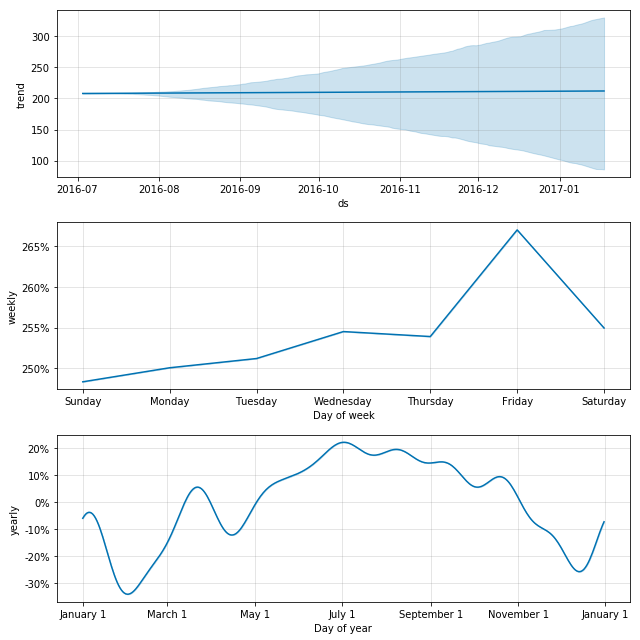

In [0]:
m.plot_components(forecast)